In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/totaldamage-countries/filtered_data.csv


In [7]:
data = pd.read_csv('/kaggle/input/totaldamage-countries/filtered_data.csv')

# **Dataset Overview**

This dataset compiles disaster-related incidents across various countries and regions, detailing the impact in terms of human casualties and financial damages. It includes environmental and economic factors, allowing for analysis of the correlation between disaster impacts and economic indicators.

**Attribute Descriptions**

**Disaster Group:** Classification of the disaster (e.g., Natural).

**Disaster Type:** Specific type of disaster (e.g., Flood, Storm, Wildfire).

**Country:** The country where the disaster occurred.

**Region:** Geographical region of the disaster.

**Total Deaths:** Number of confirmed deaths due to the disaster.

**Total Damage:** Estimated financial damage caused by the disaster, in USD.

**Year:** The year when the disaster occurred.

**NY.GDP.PCAP.CD:** GDP per capita at the time of the disaster, indicating the economic condition of the country.

**Country Code:** The ISO code representing the country.

**Indicator Name:** Describes the nature of the indicator, here it refers to "CO2 emissions (kt)".

**CO2 emissions (kt):** The amount of CO2 emissions in kilotons for the country in the specified year, providing context on environmental factors.

**This dataset can be utilized for:**

Analyzing the relationship between economic conditions and the severity of disasters.
Studying the impact of natural disasters on human lives and economic conditions.
Evaluating environmental impacts in terms of CO2 emissions related to disaster events.
Additional Information
This dataset requires careful consideration of external factors such as climate change, political stability, and economic resilience, which might influence both the frequency and impact of the disasters recorded.

In [8]:
data.head()

,Disaster Group,Disaster Type,Country,Region,Total Deaths,Total Damage,Year,NY.GDP.PCAP.CD,Country Code,Indicator Name,CO2 emissions (kt)
0,Natural,Flood,Angola,Africa,31.0,16995.0,2000,556.884244,AGO,CO2 emissions (kt),16204.16
1,Natural,Flood,Bangladesh,Asia,31.0,849753.0,2000,413.100185,BGD,CO2 emissions (kt),20686.70
2,Natural,Flood,Mozambique,Africa,800.0,712433.0,2000,333.775138,MOZ,CO2 emissions (kt),1426.90
3,Natural,Storm,Mozambique,Africa,17.0,1700.0,2000,333.775138,MOZ,CO2 emissions (kt),1426.90
4,Natural,Wildfire,South Africa,Africa,13.0,16995.0,2000,3241.661396,ZAF,CO2 emissions (kt),284463.30


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Deaths,2302.0,4.724235e+02,7.087722e+03,1.000000,6.000000,13.000000,3.600000e+01,2.225700e+05
Total Damage,2302.0,1.056194e+06,7.056881e+06,0.000000,14776.500000,104976.500000,5.116085e+05,2.732184e+08
Year,2302.0,2.010756e+03,6.588244e+00,2000.000000,2005.000000,2011.000000,2.016000e+03,2.022000e+03
NY.GDP.PCAP.CD,2302.0,1.134044e+04,1.543596e+04,137.181909,1771.594116,4421.930712,1.131749e+04,1.108860e+05
CO2 emissions (kt),2110.0,1.811425e+06,3.243922e+06,94.700000,56390.900000,280961.250000,1.227991e+06,1.094469e+07


In [10]:
# Removing both 'Indicator Name' and 'Disaster Group' columns at once
data.drop(['Indicator Name', 'Disaster Group'], axis=1, inplace=True)

# Reordering the columns to improve data structure and readability
data = data[['Year', 'Country Code','Country','Region', 'Disaster Type', 'Total Deaths', 'Total Damage', 'NY.GDP.PCAP.CD', 'CO2 emissions (kt)']]

# Displaying the first few rows of the modified DataFrame to check the changes
data.head()

,Year,Country Code,Country,Region,Disaster Type,Total Deaths,Total Damage,NY.GDP.PCAP.CD,CO2 emissions (kt)
0,2000,AGO,Angola,Africa,Flood,31.0,16995.0,556.884244,16204.16
1,2000,BGD,Bangladesh,Asia,Flood,31.0,849753.0,413.100185,20686.70
2,2000,MOZ,Mozambique,Africa,Flood,800.0,712433.0,333.775138,1426.90
3,2000,MOZ,Mozambique,Africa,Storm,17.0,1700.0,333.775138,1426.90
4,2000,ZAF,South Africa,Africa,Wildfire,13.0,16995.0,3241.661396,284463.30


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2302 non-null   int64  
 1   Country Code        2302 non-null   object 
 2   Country             2302 non-null   object 
 3   Region              2302 non-null   object 
 4   Disaster Type       2302 non-null   object 
 5   Total Deaths        2302 non-null   float64
 6   Total Damage        2302 non-null   float64
 7   NY.GDP.PCAP.CD      2302 non-null   float64
 8   CO2 emissions (kt)  2110 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 162.0+ KB


# **Questions for Analysis**

**Which countries experience the highest total damages from natural disasters?**

This question aims to identify regions that are most financially impacted by disasters, potentially guiding resource allocation and disaster preparedness strategies.

**Is there a correlation between the GDP per capita of a country and the total damage caused by disasters?**

Understanding whether countries with higher or lower GDP per capita suffer more in terms of economic damages can offer insights into the economic resilience and disaster response capabilities.

**How does the type of natural disaster (flood, storm, wildfire) affect the total number of deaths?**

Analyzing mortality based on disaster types may help in tailoring emergency response strategies specific to each disaster type.

**Do regions with higher CO2 emissions experience more severe natural disasters in terms of total damage and deaths?**

This question explores the possible link between environmental impact (CO2 emissions) and the severity of natural disasters, which could be crucial for environmental policy adjustments.

**Are there trends over the years in terms of increasing or decreasing total damages from natural disasters?**

Trends can indicate whether the situation is improving or worsening over time, providing crucial data for long-term planning and climate change mitigation efforts.

# **Data Preprocessing**

In [12]:
df = data.copy()

In [13]:
# Check for any missing values in the dataset
df.isnull().sum()

Year                    0
Country Code            0
Country                 0
Region                  0
Disaster Type           0
Total Deaths            0
Total Damage            0
NY.GDP.PCAP.CD          0
CO2 emissions (kt)    192
dtype: int64

# > Handling Missing Values in "CO2 emissions (kt)

In [14]:
# Fill missing CO2 emissions with the median
df['CO2 emissions (kt)'].fillna(df['CO2 emissions (kt)'].median(), inplace=True)

/tmp/ipykernel_33/899192754.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CO2 emissions (kt)'].fillna(df['CO2 emissions (kt)'].median(), inplace=True)


In [15]:
df.isna().sum()

Year                  0
Country Code          0
Country               0
Region                0
Disaster Type         0
Total Deaths          0
Total Damage          0
NY.GDP.PCAP.CD        0
CO2 emissions (kt)    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2302 non-null   int64  
 1   Country Code        2302 non-null   object 
 2   Country             2302 non-null   object 
 3   Region              2302 non-null   object 
 4   Disaster Type       2302 non-null   object 
 5   Total Deaths        2302 non-null   float64
 6   Total Damage        2302 non-null   float64
 7   NY.GDP.PCAP.CD      2302 non-null   float64
 8   CO2 emissions (kt)  2302 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 162.0+ KB


# > Convert Data Types

In [17]:
# Convert 'Year' to a datetime type
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# > Encode Categorical Variables:

In [59]:
df = pd.get_dummies(df, columns=['Region', 'Disaster Type'])


# > Check for Outliers:

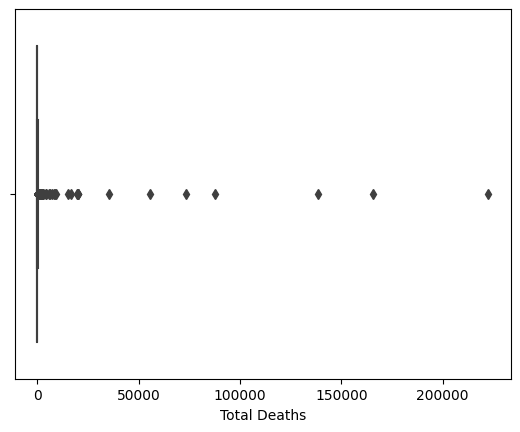

In [60]:
# Visualizing outliers in Total Deaths
sns.boxplot(x=df['Total Deaths'])
plt.show()

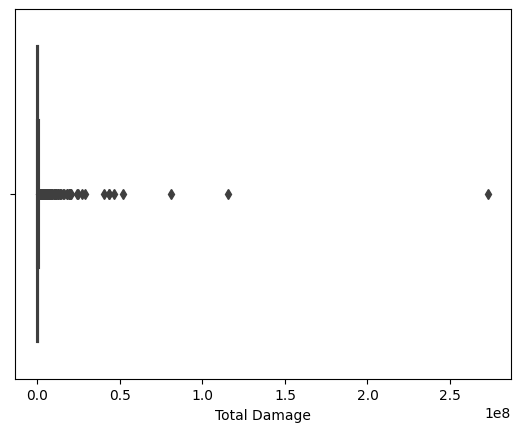

In [61]:
# Visualizing outliers in Total Damage
sns.boxplot(x=df['Total Damage'])
plt.show()

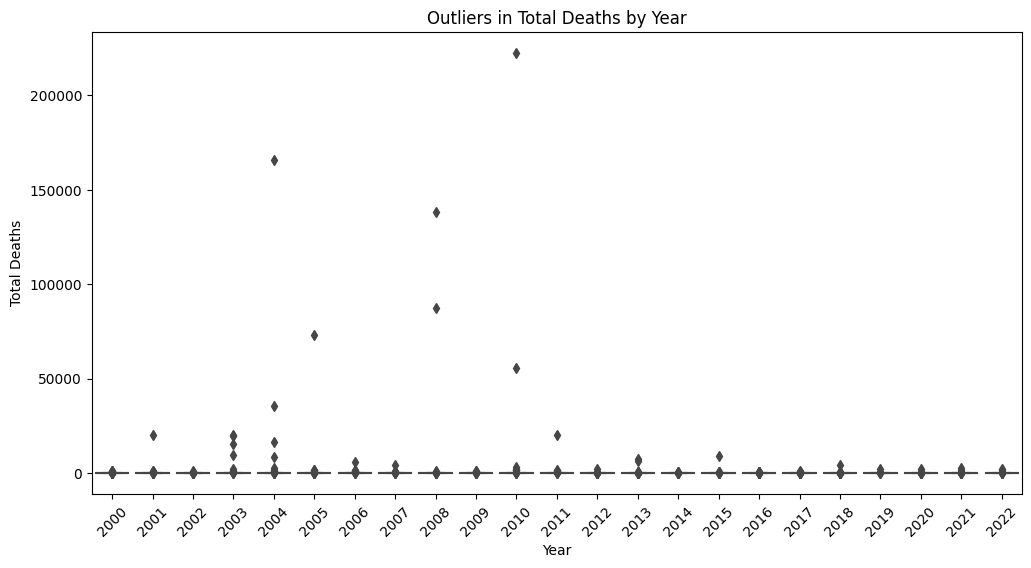

In [46]:
# Creating a boxplot to visualize outliers in 'Total Deaths' grouped by Year
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
sns.boxplot(x=df['Year'].dt.year, y=df['Total Deaths'])  # Group data by Year and plot Total Deaths
plt.xticks(rotation=45)  # Rotate the x labels for better visibility
plt.title('Outliers in Total Deaths by Year')
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


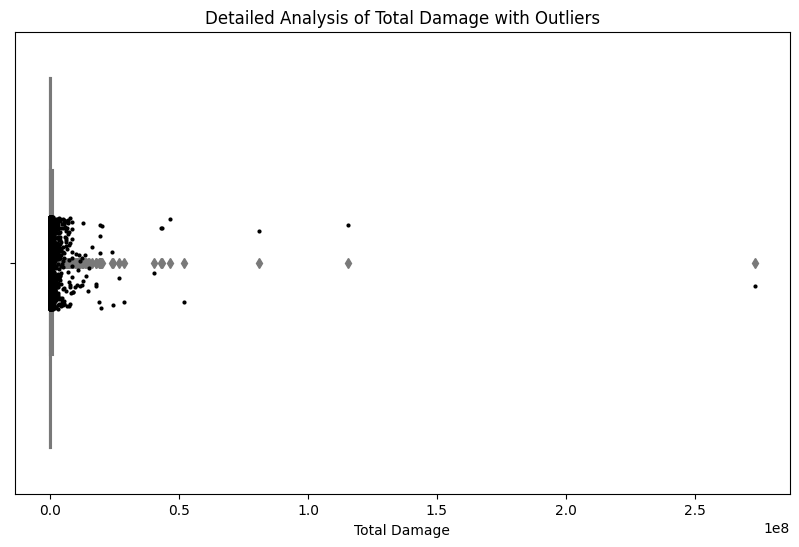

In [62]:
plt.figure(figsize=(10, 6))

# Create a boxplot to see the quartile distributions
sns.boxplot(x=df['Total Damage'], color='lightblue')

# Overlay a strip plot which shows each data point separately
sns.stripplot(x=df['Total Damage'], color='black', jitter=True, size=3)

# Customize the plot for better readability
plt.title('Detailed Analysis of Total Damage with Outliers')
plt.xlabel('Total Damage')
plt.show()


In [63]:
df['Total Damage'].describe()

count    2.302000e+03
mean     1.056194e+06
std      7.056881e+06
min      0.000000e+00
25%      1.477650e+04
50%      1.049765e+05
75%      5.116085e+05
max      2.732184e+08
Name: Total Damage, dtype: float64

In [73]:
df.head()

,Year,Country Code,Country,Region,Disaster Type,Total Deaths,Total Damage,NY.GDP.PCAP.CD,CO2 emissions (kt)
0,2000,AGO,Angola,Africa,Flood,31.0,16995.0,556.884244,16204.16
1,2000,BGD,Bangladesh,Asia,Flood,31.0,849753.0,413.100185,20686.70
2,2000,MOZ,Mozambique,Africa,Flood,800.0,712433.0,333.775138,1426.90
3,2000,MOZ,Mozambique,Africa,Storm,17.0,1700.0,333.775138,1426.90
4,2000,ZAF,South Africa,Africa,Wildfire,13.0,16995.0,3241.661396,284463.30


# > Univariate Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


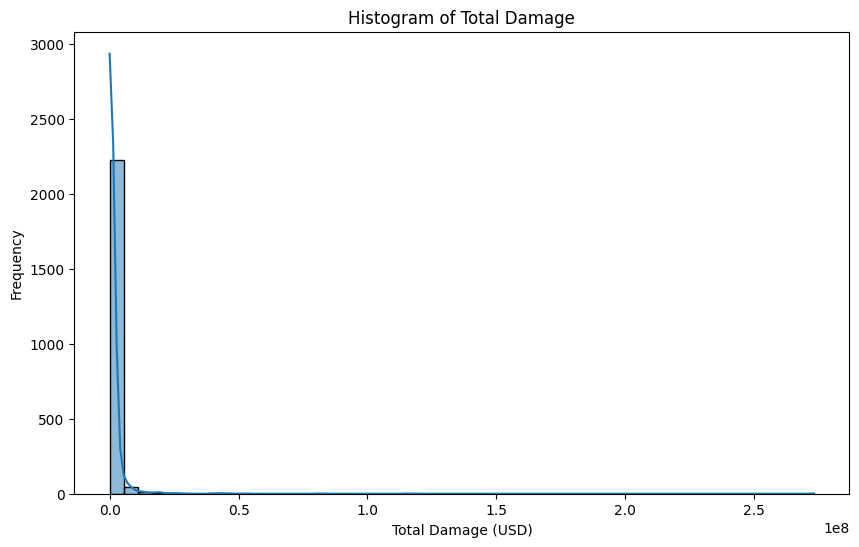

In [76]:
# Histogram of Total Damage
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Damage'], bins=50, kde=True)
plt.title('Histogram of Total Damage')
plt.xlabel('Total Damage (USD)')
plt.ylabel('Frequency')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


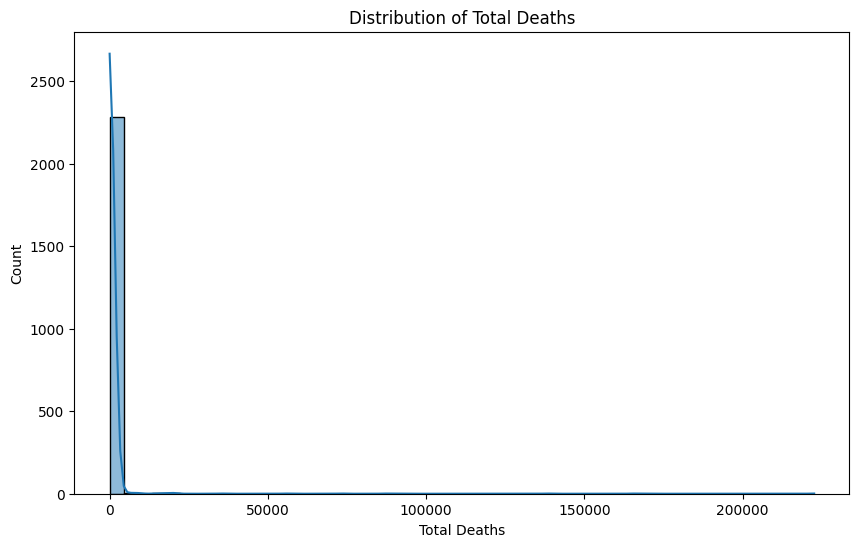

In [68]:
# Total Deaths distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Deaths'], bins=50, kde=True)
plt.title('Distribution of Total Deaths')
plt.xlabel('Total Deaths')
plt.show()


# > Bivariate Analysis

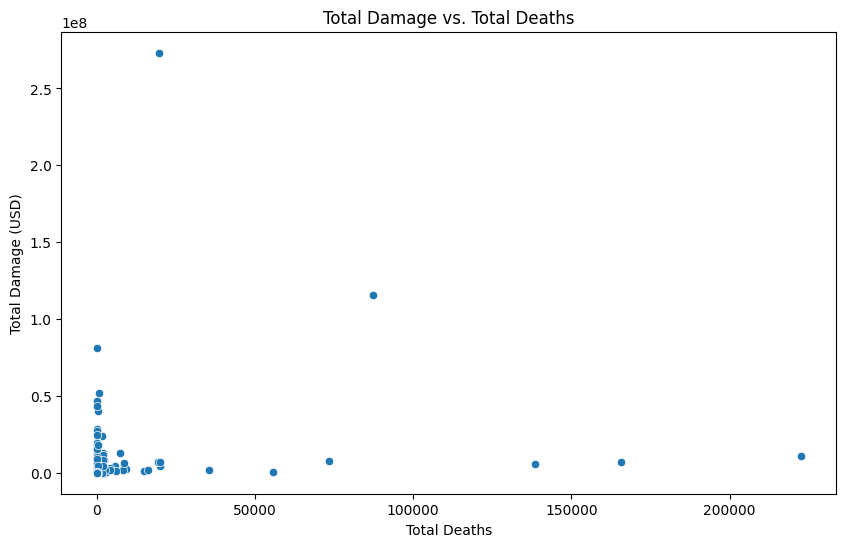

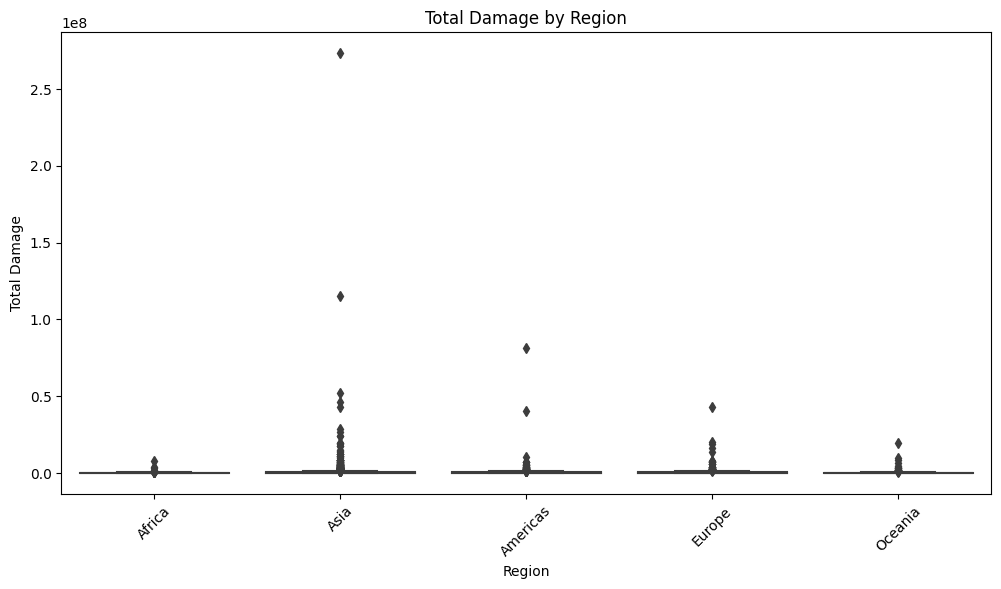

In [74]:
# Relationship between Total Damage and Total Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Deaths', y='Total Damage', data=df)
plt.title('Total Damage vs. Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Total Damage (USD)')
plt.show()

# Analyzing damage by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total Damage', data=df)
plt.title('Total Damage by Region')
plt.xticks(rotation=45)
plt.show()


# > Multivariate Analysis

                    Total Deaths  Total Damage  NY.GDP.PCAP.CD  \
Total Deaths            1.000000      0.177195       -0.028851   
Total Damage            0.177195      1.000000        0.100813   
NY.GDP.PCAP.CD         -0.028851      0.100813        1.000000   
CO2 emissions (kt)     -0.013656      0.038954       -0.118432   

                    CO2 emissions (kt)  
Total Deaths                 -0.013656  
Total Damage                  0.038954  
NY.GDP.PCAP.CD               -0.118432  
CO2 emissions (kt)            1.000000  


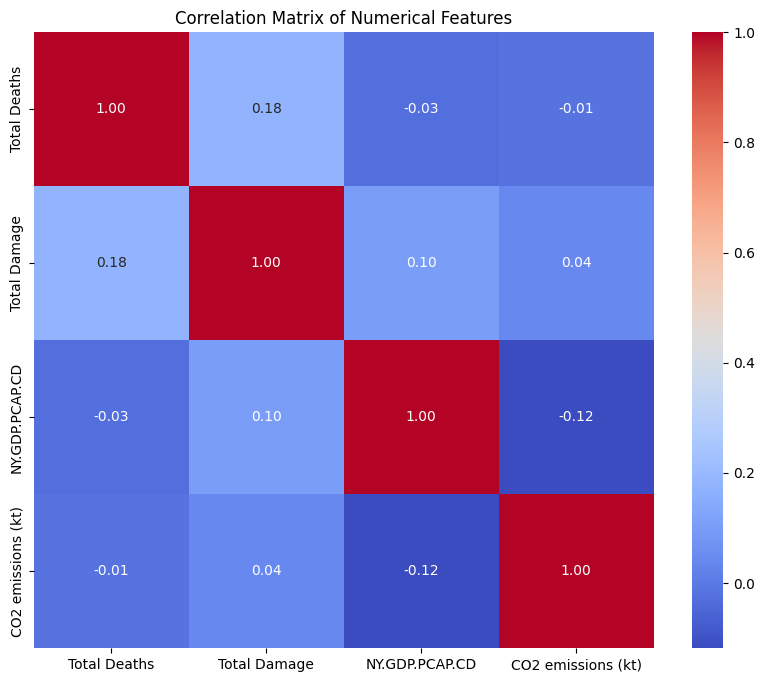

In [83]:
# Selecting only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
corr_matrix = numerical_df.corr()
print(corr_matrix)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# **Correlation Analysis**
​
**Total Deaths and Total Damage (Correlation: 0.177195)**
​
There is a weak positive correlation between the total deaths and total damage. This suggests that as the number of deaths in disasters increases, there might be a slight increase in the total damage reported. However, the correlation is not strong enough to imply a significant direct relationship.

**Total Deaths and NY.GDP.PCAP.CD (Correlation: -0.028851)**
​

There is a negligible negative correlation between total deaths and GDP per capita. This indicates that higher GDP per capita in a country does not necessarily correlate with fewer deaths from disasters, but the correlation is very weak, suggesting no significant relationship.
​

**Total Damage and NY.GDP.PCAP.CD (Correlation: 0.100813)**

​
There is a weak positive correlation between total damage and GDP per capita. This might suggest that countries with higher GDP per capita report slightly higher financial damages from disasters. This could be due to the higher value of infrastructure and assets in wealthier countries, or more comprehensive reporting and valuation of losses.
​
**CO2 emissions (kt) and Other Variables**

​
**Total Deaths (Correlation: -0.013656):** There is virtually no correlation between CO2 emissions and the number of deaths, suggesting that the scale of emissions does not directly relate to the lethality of disasters.

​
**Total Damage (Correlation: 0.038954):** Similarly, there is a very weak positive correlation between CO2 emissions and total damage, indicating that larger emissions are not substantially associated with greater disaster damage.

​
**NY.GDP.PCAP.CD (Correlation: -0.118432):** There is a weak negative correlation between CO2 emissions and GDP per capita, which might suggest that higher GDP per capita could be associated with slightly lower emissions. This could be reflective of more efficient energy use or better environmental regulations in wealthier countries, though the correlation is still weak.

# > Temporal Analysis

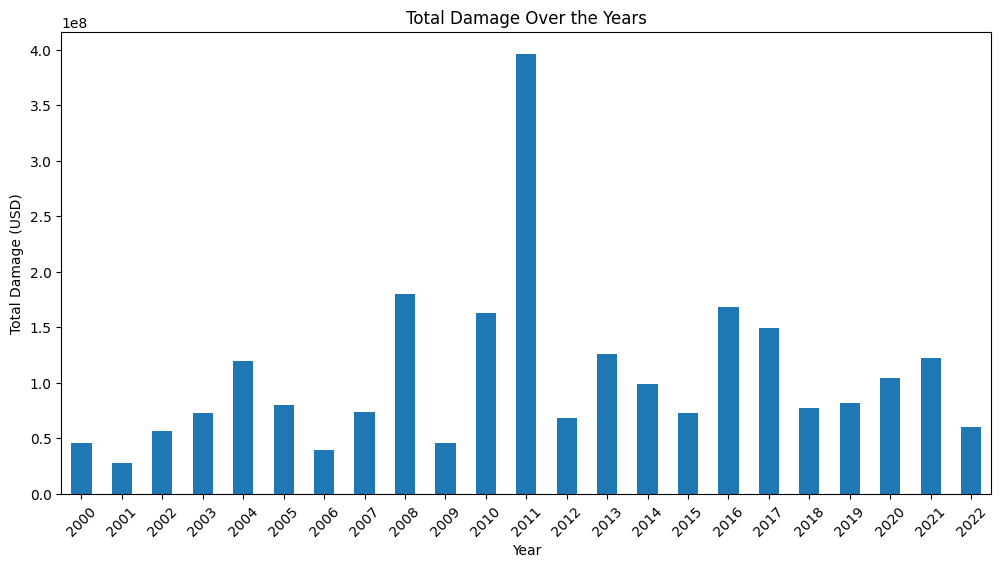

In [81]:
# Group data by year and summarize total damage
yearly_damage = df.groupby(df['Year'].dt.year)['Total Damage'].sum()

plt.figure(figsize=(12, 6))
yearly_damage.plot(kind='bar')
plt.title('Total Damage Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Damage (USD)')
plt.xticks(rotation=45)
plt.show()


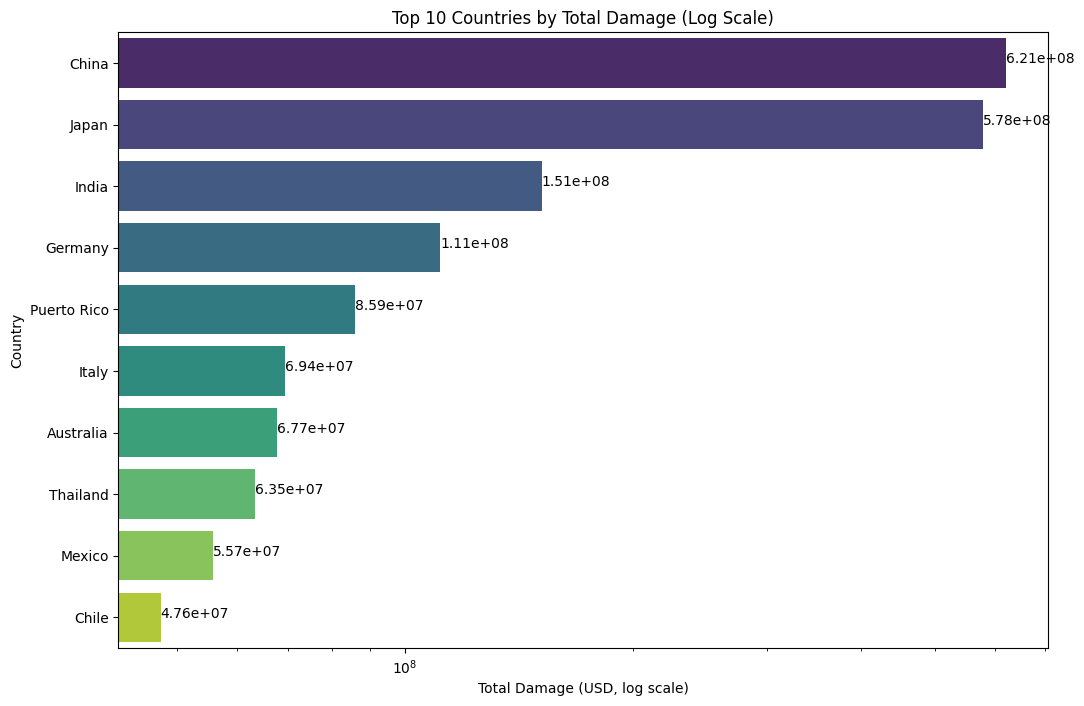

In [108]:
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis', log=True)

# Adding annotations
for index, value in enumerate(top_countries.values):
    plt.text(value, index, f'{value:.2e}')  # Formatting the number as scientific notation

plt.title('Top 10 Countries by Total Damage (Log Scale)')
plt.xlabel('Total Damage (USD, log scale)')
plt.ylabel('Country')
plt.show()

# > Preparing for TimeSeries

In [86]:
# Grouping data by Year and Region to sum up Total Damage
grouped_data = df.groupby([df['Year'].dt.year, 'Region'])['Total Damage'].sum().reset_index()

In [87]:
# Sorting the data
grouped_data.sort_values(by=['Region', 'Year'], inplace=True)

# Checking for missing years in the data
grouped_data.pivot(index='Year', columns='Region', values='Total Damage').isnull().sum()

Region
Africa      0
Americas    0
Asia        0
Europe      0
Oceania     0
dtype: int64

In [89]:
# Filling missing values using interpolation
filled_data = grouped_data.pivot(index='Year', columns='Region', values='Total Damage').interpolate()

# Backfill or forward fill if needed
filled_data.fillna(method='ffill', inplace=True)
filled_data.fillna(method='bfill', inplace=True)


/tmp/ipykernel_33/1835990826.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_33/1835990826.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data.fillna(method='bfill', inplace=True)


In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example using SARIMAX for one region
model = SARIMAX(filled_data['Africa'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19195D+00    |proj g|=  2.26303D-01

At iterate    5    f=  7.09246D+00    |proj g|=  1.57578D-02

At iterate   10    f=  7.08674D+00    |proj g|=  1.05731D-03

At iterate   15    f=  7.08638D+00    |proj g|=  4.18917D-03

At iterate   20    f=  7.08631D+00    |proj g|=  1.83010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   4.067D-06   7.086D+00
  F =   7.0863046460796362     

CONVERG

In [92]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Africa   No. Observations:                   23
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -162.985
Date:                            Wed, 01 May 2024   AIC                            335.970
Time:                                    21:46:03   BIC                            337.483
Sample:                                         0   HQIC                           334.310
                                             - 23                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7744      5.863     -0.132      0.895     -12.267      10.718
ma.L1         -0.5196      2.251     -0.231      0.817      -4.931       3.892
ar.S.L12      -0.9796      4.646     -0.211      0.833     -10.085       8.125
ma.S.L12       0.0004    102.803   3.93e-06      1.000    -201.489     201.490
sigma2      1.558e+13   2.13e-10    7.3e+22      0.000    1.56e+13    1.56e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                12.06
Prob(Q):                              0.46   Prob(JB):                         0.00
Heteroskedasticity (H):              18.78   Skew:                             2.09
Prob(H) (two-sided):                  0.04   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.85e+39. Standard errors may be unstable.
"""

In [94]:
# Convert 'Year' column to datetime if it's not already
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Set 'Year' as the index of the DataFrame
df.set_index('Year', inplace=True)

In [95]:
model = SARIMAX(df['Total Damage'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Show the summary of the model fit
print(results.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73431D+01    |proj g|=  7.77897D-02


 This problem is unconstrained.



At iterate    5    f=  1.72661D+01    |proj g|=  2.21015D-02

At iterate   10    f=  1.72576D+01    |proj g|=  4.20437D-03

At iterate   15    f=  1.72571D+01    |proj g|=  1.05228D-03

At iterate   20    f=  1.72566D+01    |proj g|=  1.85186D-03

At iterate   25    f=  1.72566D+01    |proj g|=  7.34595D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   7.346D-05   1.726D+01
  F =   17.256608398819253     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                      
Dep. Variable:        

In [96]:
# Forecasting the next 5 periods
forecast = results.get_forecast(steps=5)
print(forecast.summary_frame())


Total Damage          mean       mean_se  mean_ci_lower  mean_ci_upper
2302          7.136884e+05  1.108984e+07  -2.102200e+07   2.244938e+07
2303          1.304669e+06  1.109298e+07  -2.043718e+07   2.304651e+07
2304          2.150265e+06  1.109318e+07  -1.959196e+07   2.389249e+07
2305          1.474810e+06  1.109335e+07  -2.026776e+07   2.321738e+07
2306          1.546529e+06  1.109352e+07  -2.019638e+07   2.328944e+07


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


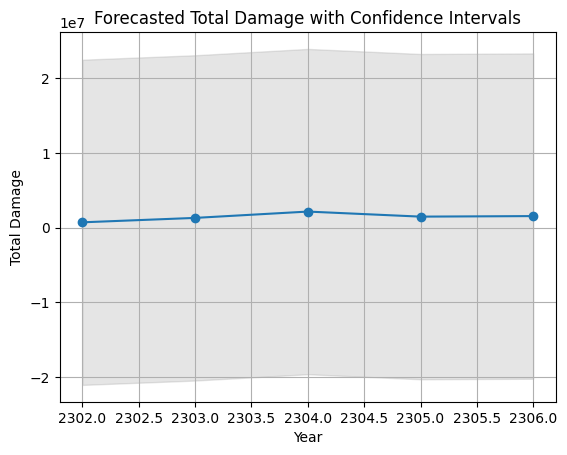

In [97]:
# Example dataframe setup (assuming df_forecast is your forecast dataframe)
df_forecast = pd.DataFrame({
    'Year': [2302, 2303, 2304, 2305, 2306],
    'mean': [713688, 1304669, 2150265, 1474810, 1546529],
    'mean_ci_lower': [-21022000, -20437180, -19591960, -20267760, -20196380],
    'mean_ci_upper': [22449380, 23046510, 23892490, 23217380, 23289440]
})

plt.fill_between(df_forecast['Year'], df_forecast['mean_ci_lower'], df_forecast['mean_ci_upper'], color='gray', alpha=0.2)
plt.plot(df_forecast['Year'], df_forecast['mean'], marker='o')
plt.title('Forecasted Total Damage with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Total Damage')
plt.grid(True)
plt.show()


In [98]:

# Example of setting a datetime index assuming the original data has a column 'Year' that should represent calendar years
if 'Year' in df.columns:
    df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Adjust format as needed
    df.set_index('Year', inplace=True)

# Check the current index
print(df.index)

# If you need to reset the forecast's index to a range starting from the last date in your training data:
last_known_year = df.index.max()
forecast_years = pd.date_range(start=last_known_year + pd.DateOffset(years=1), periods=5, freq='A')
df_forecast = pd.DataFrame({
    'Year': forecast_years,
    'mean': [713688, 1304669, 2150265, 1474810, 1546529],
    'mean_ci_lower': [-21022000, -20437180, -19591960, -20267760, -20196380],
    'mean_ci_upper': [22449380, 23046510, 23892490, 23217380, 23289440]
})
df_forecast.set_index('Year', inplace=True)

# Now, the forecast should correctly reflect future years in a recognizable format.
print(df_forecast.index)


DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01', '2000-01-01', '2000-01-01', '2000-01-01',
               '2000-01-01', '2000-01-01',
               ...
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01', '2022-01-01', '2022-01-01',
               '2022-01-01', '2022-01-01'],
              dtype='datetime64[ns]', name='Year', length=2302, freq=None)
DatetimeIndex(['2023-12-31', '2024-12-31', '2025-12-31', '2026-12-31',
               '2027-12-31'],
              dtype='datetime64[ns]', name='Year', freq=None)


/tmp/ipykernel_33/2433980163.py:11: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_years = pd.date_range(start=last_known_year + pd.DateOffset(years=1), periods=5, freq='A')


In [99]:
# Assuming the SARIMAX model has been set up as previously described:
results = model.fit()
forecast = results.get_forecast(steps=5)

# Attach the correct future dates to the forecast
forecast.index = forecast_years  # Align forecast index with the forecast_years generated above


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73431D+01    |proj g|=  7.77897D-02


 This problem is unconstrained.



At iterate    5    f=  1.72661D+01    |proj g|=  2.21015D-02

At iterate   10    f=  1.72576D+01    |proj g|=  4.20437D-03

At iterate   15    f=  1.72571D+01    |proj g|=  1.05228D-03

At iterate   20    f=  1.72566D+01    |proj g|=  1.85186D-03

At iterate   25    f=  1.72566D+01    |proj g|=  7.34595D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     31      1     0     0   7.346D-05   1.726D+01
  F =   17.256608398819253     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [105]:
# Generate forecasts for the next 5 years
forecast = results.get_forecast(steps=5)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Prepare forecast DataFrame
df_forecast = pd.DataFrame({
    'Total Damage Mean': forecast_mean,
    'CI Lower': forecast_conf_int.iloc[:, 0],
    'CI Upper': forecast_conf_int.iloc[:, 1]
})
df_forecast.index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=5, freq='A-DEC')  # Adjust based on your last known data point


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/tmp/ipykernel_33/1200639921.py:12: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.
  df_forecast.index = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=5, freq='A-DEC')  # Adjust based on your last known data point


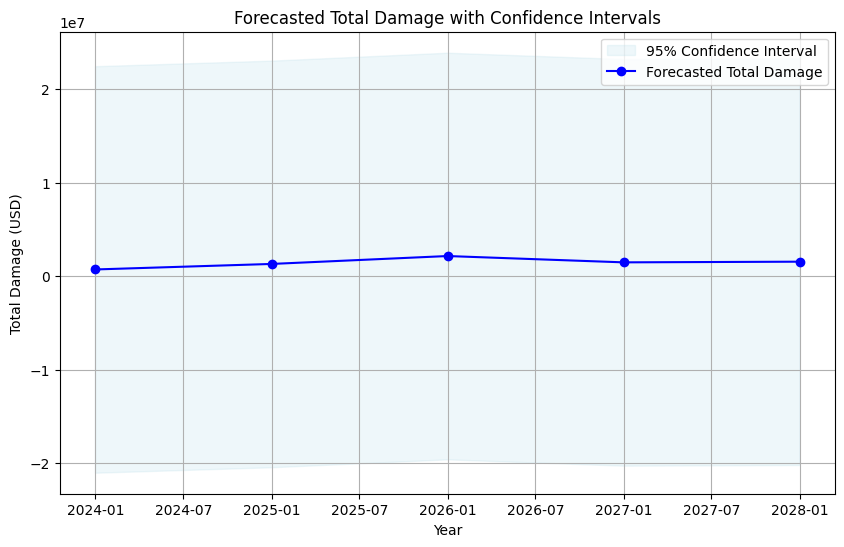

In [110]:


plt.figure(figsize=(10, 6))
plt.fill_between(df_forecast.index, df_forecast['CI Lower'], df_forecast['CI Upper'], color='lightblue', alpha=0.2, label='95% Confidence Interval')
plt.plot(df_forecast.index, df_forecast['Total Damage Mean'], marker='o', color='b', linestyle='-', label='Forecasted Total Damage')
plt.title('Forecasted Total Damage with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Total Damage (USD)')
plt.grid(True)
plt.legend()
plt.show()


In [109]:
total_forecasted_damage_by_country = df_forecasts.groupby('Country')['Total Damage'].sum().sort_values(ascending=False)

# Let's focus on the top 10 for clarity
top_forecasted_countries = total_forecasted_damage_by_country.head(10)

NameError: name 'df_forecasts' is not defined

In [101]:
df.head()

,Country Code,Country,Region,Disaster Type,Total Deaths,Total Damage,NY.GDP.PCAP.CD,CO2 emissions (kt)
Year,,,,,,,,
2000-01-01,AGO,Angola,Africa,Flood,31.0,16995.0,556.884244,16204.16
2000-01-01,BGD,Bangladesh,Asia,Flood,31.0,849753.0,413.100185,20686.70
2000-01-01,MOZ,Mozambique,Africa,Flood,800.0,712433.0,333.775138,1426.90
2000-01-01,MOZ,Mozambique,Africa,Storm,17.0,1700.0,333.775138,1426.90
2000-01-01,ZAF,South Africa,Africa,Wildfire,13.0,16995.0,3241.661396,284463.30


In [38]:
df['Region'].value_counts()

Region
Asia        1247
Americas     392
Europe       338
Africa       165
Oceania      160
Name: count, dtype: int64

# > Regression Model

In [23]:
!pip install -U scikit-learn 


In [22]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import root_mean_squared_error

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (/opt/conda/lib/python3.10/site-packages/sklearn/metrics/__init__.py)

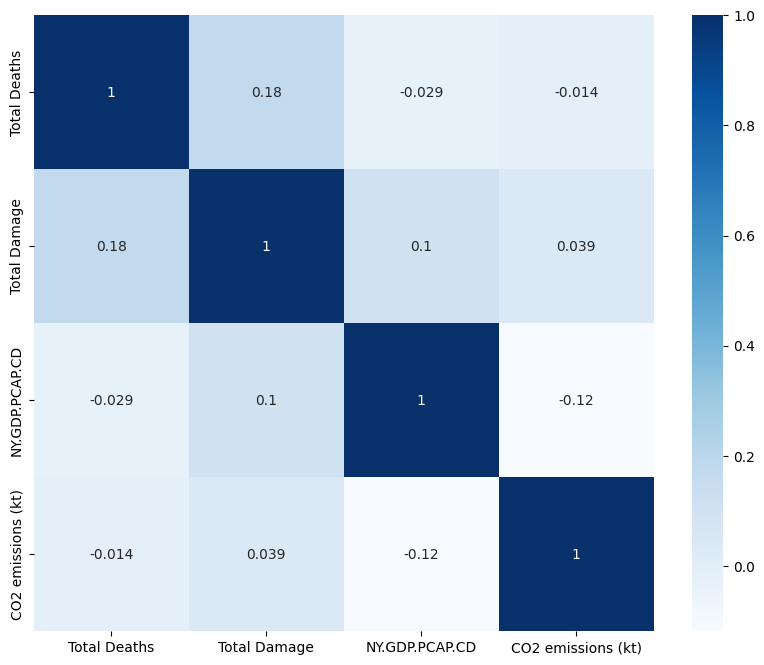

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plotting correlations of numeric data only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

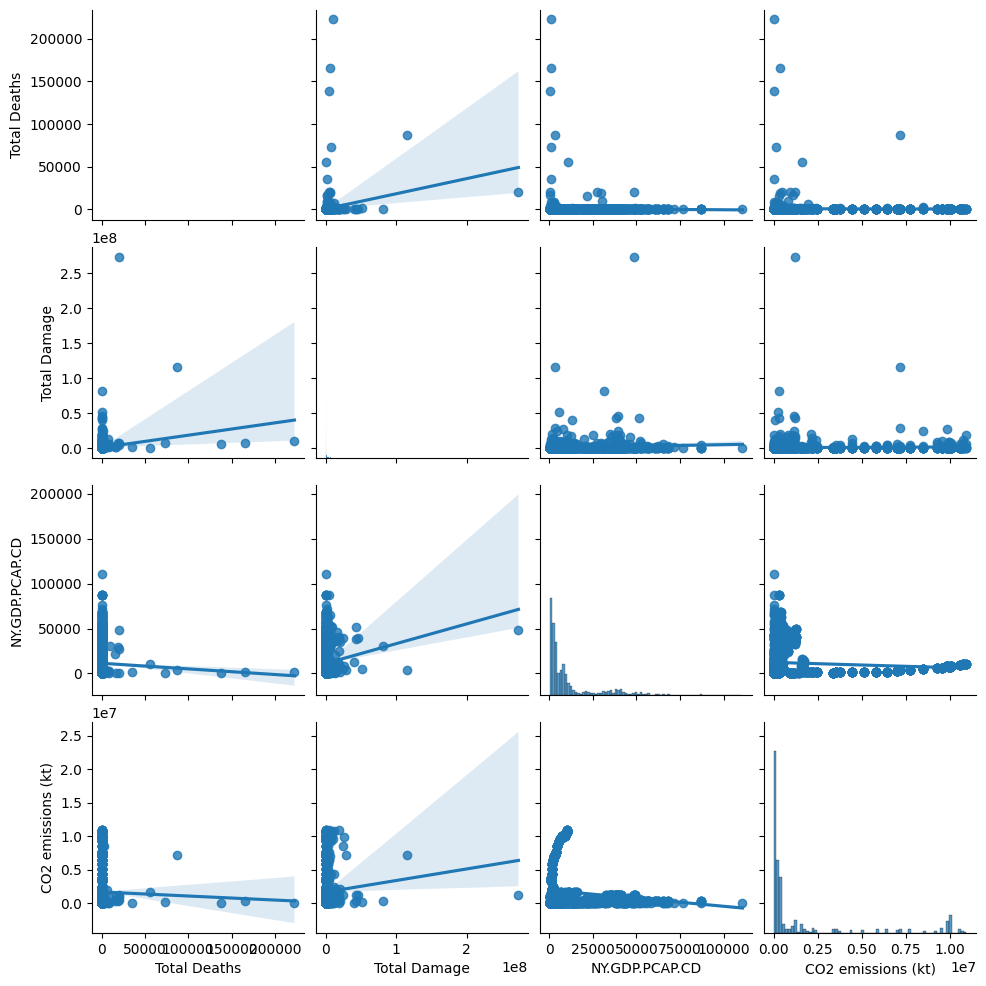

In [19]:
sns.pairplot(df, kind ="reg")

In [42]:
df_clean = df.copy()
df_clean = pd.get_dummies(df, columns=['Region', 'Disaster Type'])
# Drop unnecessary columns
df_clean.drop(['Country', 'Country Code'], axis=1, inplace=True) 
# Convert boolean columns to int
for column in df_clean.columns:
    if df_clean[column].dtype == bool:
        df_clean[column] = df_clean[column].astype(int)
# Convert all columns to integers if they are numeric
for column in df_clean.columns:
    if df_clean[column].dtype in ['float64', 'float32']:  # This ensures only numeric columns are converted
        df_clean[column] = df_clean[column].astype(int)
df_clean['Year'].astype(int)
df_clean

,Year,Total Deaths,Total Damage,NY.GDP.PCAP.CD,CO2 emissions (kt),Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Oceania,...,Disaster Type_Extreme temperature,Disaster Type_Flood,Disaster Type_Glacial lake outburst flood,Disaster Type_Impact,Disaster Type_Infestation,Disaster Type_Mass movement (dry),Disaster Type_Mass movement (wet),Disaster Type_Storm,Disaster Type_Volcanic activity,Disaster Type_Wildfire
0,2000-01-01,31,16995,556,16204,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2000-01-01,31,849753,413,20686,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2000-01-01,800,712433,333,1426,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2000-01-01,17,1700,333,1426,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2000-01-01,13,16995,3241,284463,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,2022-01-01,10,17000,5127,280961,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2298,2022-01-01,146,10000,1102,280961,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2299,2022-01-01,13,47000,13974,280961,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2300,2022-01-01,13,640000,1027,280961,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Ensure 'df' does not include non-numeric columns like dates or categoricals that are not encoded properly
X = df_clean.select_dtypes(include=[np.number])  # This selects only numeric columns

# Assuming 'Total Damage' is what you're predicting, ensure it's not in your features
X = X.drop(columns=['Total Damage'], errors='ignore')  # Use errors='ignore' to avoid issues if the column isn't there

y = df_clean['Total Damage']

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [63]:
# Optionally convert scaled arrays back to DataFrame for better handling in pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the scaled data
print(X_train_scaled.head())

   Total Deaths  NY.GDP.PCAP.CD  CO2 emissions (kt)  Region_Africa  \
0     -0.046208       -0.659582           -0.006305      -0.272029   
1     -0.077324       -0.653102           -0.514847      -0.272029   
2     -0.075917        1.579418           -0.417402      -0.272029   
3     -0.074353        1.787849           -0.166522      -0.272029   
4      1.384812        1.180152           -0.269480      -0.272029   

   Region_Americas  Region_Asia  Region_Europe  Region_Oceania  \
0        -0.450707     0.914847      -0.417371       -0.273343   
1        -0.450707     0.914847      -0.417371       -0.273343   
2        -0.450707    -1.093080      -0.417371        3.658405   
3        -0.450707     0.914847      -0.417371       -0.273343   
4        -0.450707    -1.093080       2.395952       -0.273343   

   Disaster Type_Drought  Disaster Type_Earthquake  \
0              -0.208312                 -0.344601   
1              -0.208312                 -0.344601   
2              -0.20

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [54]:
logreg = LogisticRegression (max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_probs = logreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
AUC=roc_auc_score(y_test, y_pred_probs)
print('AUC = ',AUC)

ValueError: multiclass format is not supported

In [55]:
accuracy = logreg.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.0021691973969631237


<Axes: ylabel='Feature'>

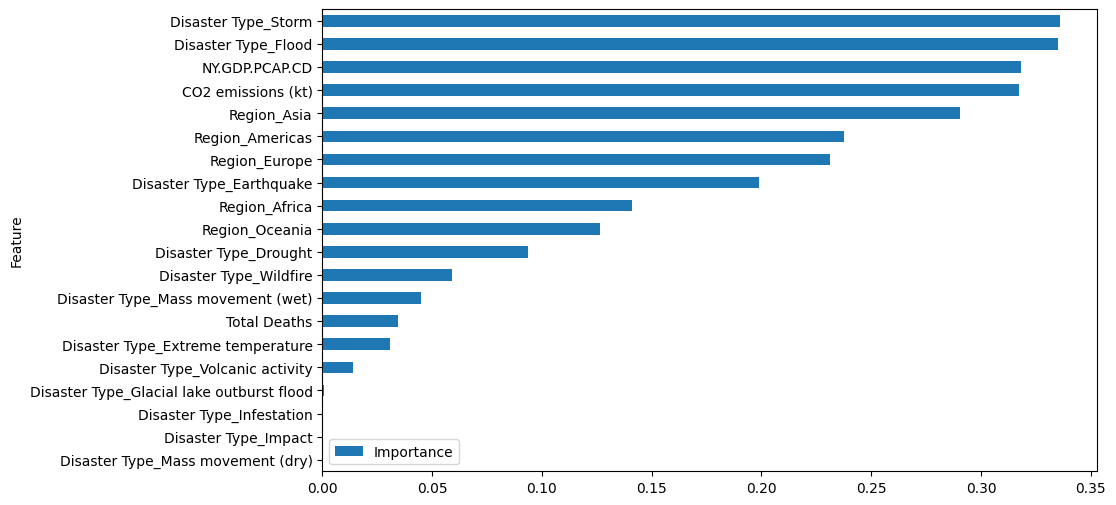

In [56]:
coefficients = logreg.coef_

avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [66]:
!pip install -U scikit-learn


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/opt/conda/lib/python3.10/site-packages/sklearn/base.py)

In [67]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


ImportError: cannot import name '_fit_context' from 'sklearn.base' (/opt/conda/lib/python3.10/site-packages/sklearn/base.py)

In [59]:
!pip install scikit-learn

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

ImportError: cannot import name '_fit_context' from 'sklearn.base' (/opt/conda/lib/python3.10/site-packages/sklearn/base.py)

In [57]:
rf = RandomForestRegressor(n_estimators= 400, min_samples_leaf= 0.12, random_state=84)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
rmse_test = MSE (y_test, y_pred)**(1/2)
print('Test est RMSE of rf:{:2f}'.format(rmse_test))

NameError: name 'RandomForestRegressor' is not defined

In [61]:
importances_rf= pd.Series (rf.feature_importances_, index= X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh')

NameError: name 'rf' is not defined